In [1]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1: Thresholding
1.  Threshold the image at three different thresholds 1) 55 2) 90 and 3) 150 using simple binary thresholding and inverse binary thresholding as defined above.
2.  Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold? (A number is considered as segmented if all digits of that number are considered as foreground in the thresholded image) What else do you observe at each threshold?
3.  Threshold the image using Window binary thresholding using three different range of thresholds. 1) T1=55 and T2=90, 2) T1=90 and T2=150, 3) T1=55 and T2=150. Write your observations. How many and which numbers are segmented at each threshold?
4.  In a practical application, we vary the value of the hyper-parameters (here, the threshold values) for any of the above mentioned thresholding methods, such that we get the desired output. Find a threshold value such that only numbers ”123” and ”549” are segmented (i.e. considered as foreground - white pixel - 255 value). See Figure 1(b). Report your finding for at least three different threshold values, and write how it helped you in narrowing down the desired hyper-parameter value.

<class 'numpy.ndarray'>


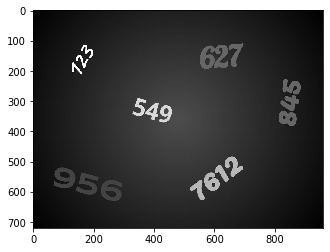

In [2]:
# load and display image
numbers_img = cv2.imread("./images/numbers.jpg")
print(type(numbers_img))
plt.imshow(numbers_img)

In [3]:
# get image dimensions
print(numbers_img.shape)
numbers_height, numbers_width, numbers_depth = numbers_img.shape

# set the thresholds
THRESHES = (55, 90, 150)

(720, 960, 3)


### Simple Binary Threshold

In [4]:
# create placeholders for the thresholded output
numbers_img_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_thresh1[numbers_img > THRESHES[0]] = 255
numbers_img_thresh2[numbers_img > THRESHES[1]] = 255
numbers_img_thresh3[numbers_img > THRESHES[2]] = 255

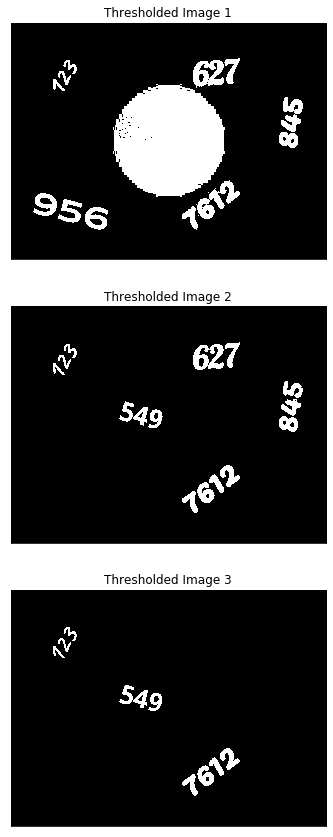

In [5]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

### Inverse Binary Threshold

In [6]:
# create placeholders for the thresholded output
numbers_img_inverse_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_inverse_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_inverse_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_inverse_thresh1[numbers_img < THRESHES[0]] = 255
numbers_img_inverse_thresh2[numbers_img < THRESHES[1]] = 255
numbers_img_inverse_thresh3[numbers_img < THRESHES[2]] = 255

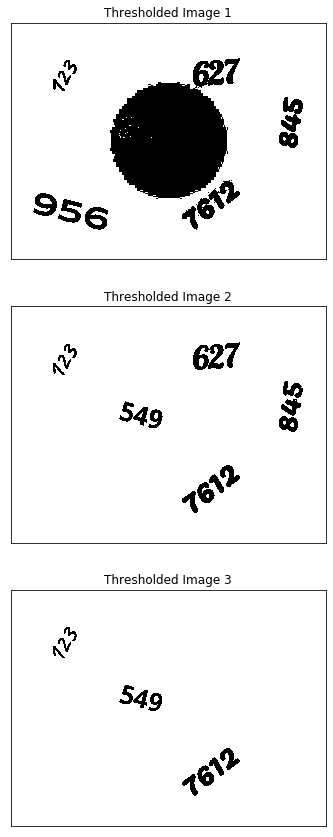

In [7]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_inverse_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_inverse_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_inverse_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

We observe that, the higher the threshold value, the less there is in the foreground.

At the first threshold value, all the numbers are segmented, and so is a circular section of the original image's background gradient. However, only five of the numbers are visible, as that circular section that is segmented coincides with the last number.

At the second threshold value, we observe only five numbers are segmented, however that circular section is no longer segmented, meaning the number that is there (549) is now visible. This came at the cost of losing 956.

At the third threshold value, only three numbers are segmented: 123, 549, and 7612.

### Window Binary Threshold

In [8]:
# set the window thresholds
WINDOW_THRESHES = ((55, 90), (90, 150), (55, 150))

In [9]:
# create placeholders for the thresholded output
numbers_img_window_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_window_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_window_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# lower threshold the images
numbers_img_window_thresh1[WINDOW_THRESHES[0][0] < numbers_img] = 255
numbers_img_window_thresh2[WINDOW_THRESHES[1][0] < numbers_img] = 255
numbers_img_window_thresh3[WINDOW_THRESHES[2][0] < numbers_img] = 255

# upper threshold the images
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[0][1]] = 0
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[1][1]] = 0
numbers_img_window_thresh1[numbers_img > WINDOW_THRESHES[2][1]] = 0

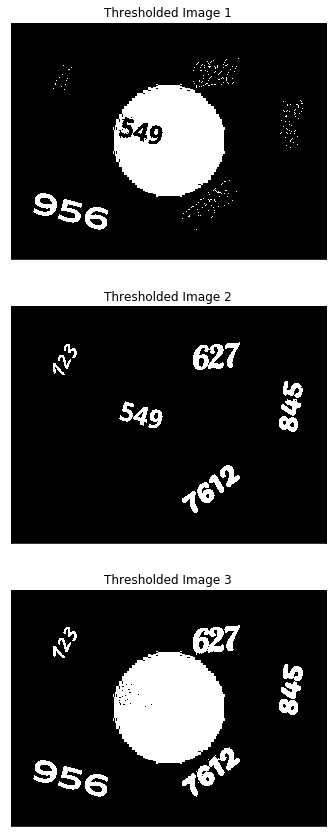

In [10]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_window_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_window_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(numbers_img_window_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

### Varying the Threshold Value

In [11]:
# set the thresholds to test
TEST_THRESHES = (150, 225)

In [12]:
# create placeholders for the thresholded output
numbers_img_test_thresh1 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)
numbers_img_test_thresh2 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the images
numbers_img_test_thresh1[numbers_img > TEST_THRESHES[0]] = 255
numbers_img_test_thresh2[numbers_img > TEST_THRESHES[1]] = 255

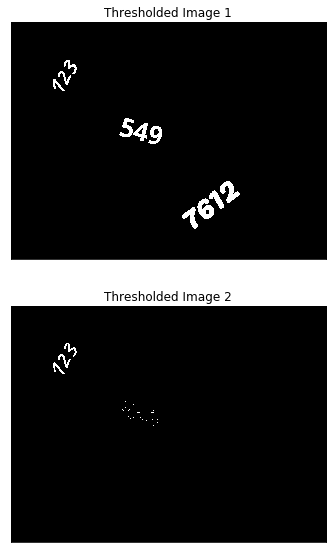

In [13]:
# display images
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_test_thresh1)
plt.title("Thresholded Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(numbers_img_test_thresh2)
plt.title("Thresholded Image 2"), plt.xticks([]), plt.yticks([])
plt.show()

As we are trying to make it so only 123 and 549 are visible, we can see above that 150 is too low of a threshold value—it captures 7612 as well—and 225 is too high of a threshold value—it just _barely_ captures some of the pixels for 549. Let's try again with 210.

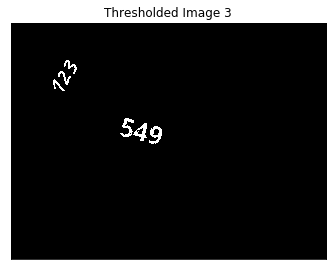

In [14]:
# set the threshold
THRESH = 210

# create placeholder for the thresholded output
numbers_img_test_thresh3 = np.zeros((numbers_height, numbers_width, numbers_depth), dtype=np.uint8)

# threshold the image
numbers_img_test_thresh3[numbers_img > THRESH] = 255

# display image
plt.figure(figsize=(16, 20))
plt.subplot(411), plt.imshow(numbers_img_test_thresh3)
plt.title("Thresholded Image 3"), plt.xticks([]), plt.yticks([])
plt.show()

There, that worked!

## Part 2: Denoising
1.  Filter the noisy image using a 5 × 5 Gaussian filter with variance equal to 2.
2.  Filter the noisy image using a box filter of the same size.
3.  Compare the Peak-Signal-to-Noise-Ratio (PSNR) of both of the denoised images to that of the clean image and state which method gives the superior result. (Use the PSNR function provided by opencv)
4.  Filter the noisy image using the same Gaussian filter as used in the previous question.
5.  Filter the noisy image using a median filter of the same size.
6.  Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

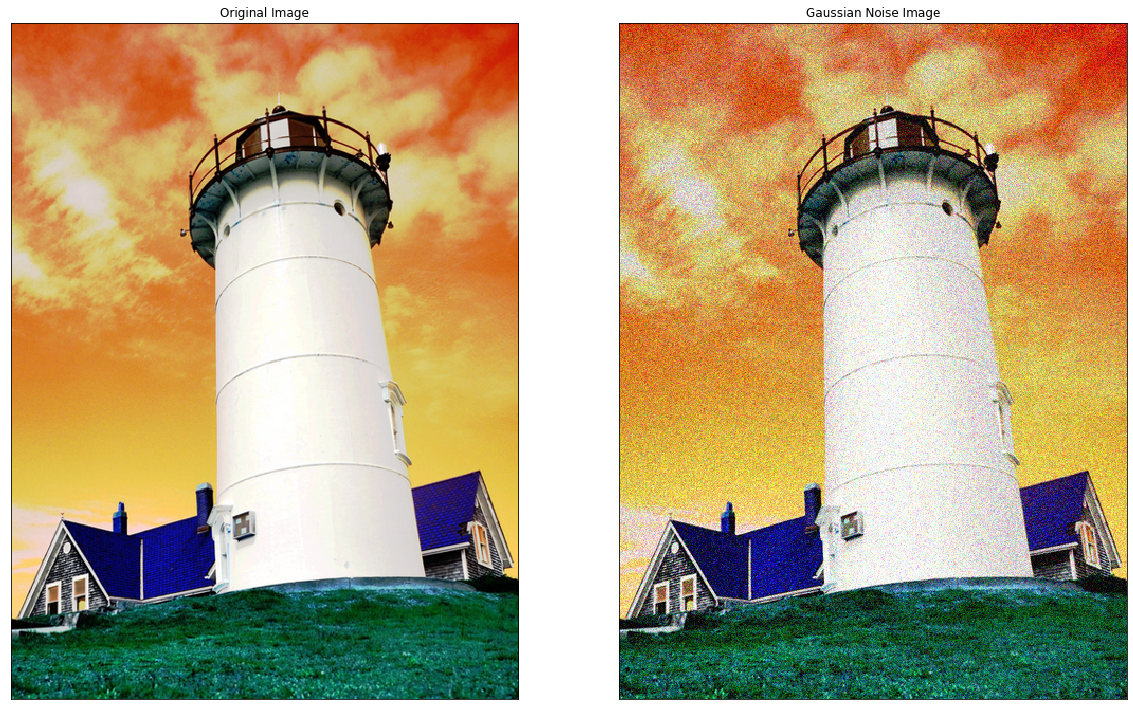

In [15]:
# load and display image
lighthouse_img = cv2.imread("./images/lighthouse.png")
gaussian_lighthouse_img = cv2.imread("./images/gaussian_lighthouse.png")

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(lighthouse_img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_lighthouse_img, cmap="gray")
plt.title("Gaussian Noise Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
# convert to grayscale and get dimensions
lighthouse_img_grey = cv2.cvtColor(lighthouse_img, cv2.COLOR_BGR2GRAY)
gaussian_lighthouse_img_grey = cv2.cvtColor(gaussian_lighthouse_img, cv2.COLOR_BGR2GRAY)
lighthouse_height, lighthouse_width = lighthouse_img_grey.shape

### Gaussian Filter

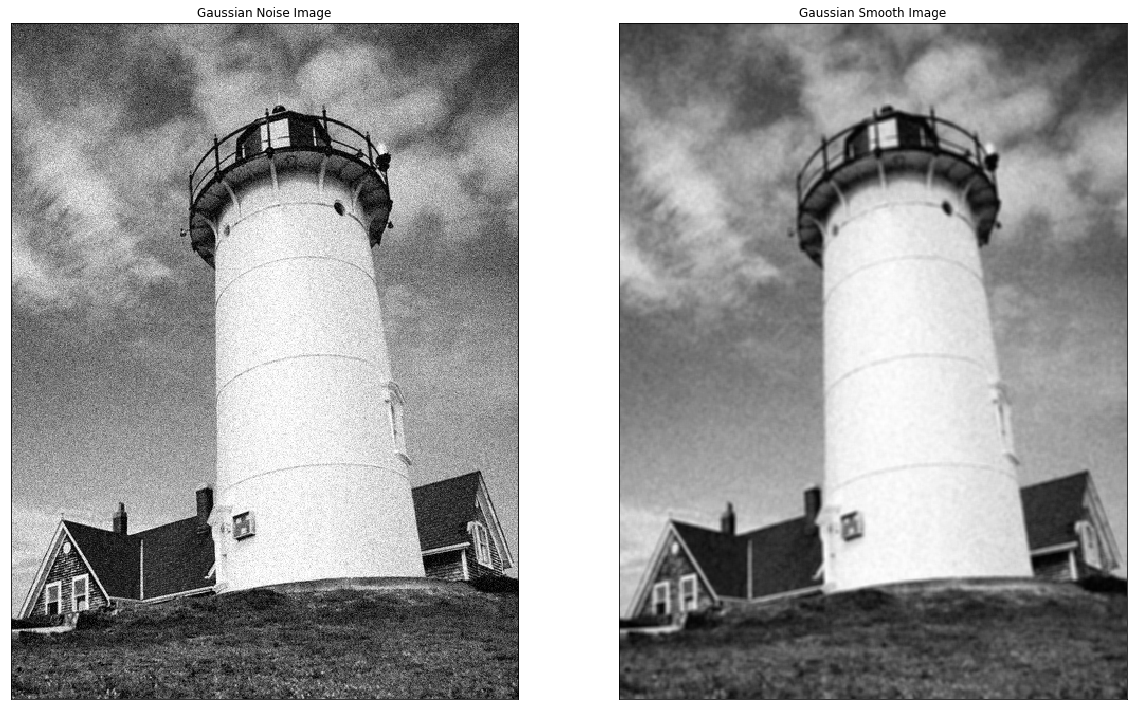

In [17]:
# apply gaussian filter to image
gaussian_lighthouse_img_gauss = cv2.GaussianBlur(gaussian_lighthouse_img_grey, (5,5), 2)

# display original and gaussian smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaussian_lighthouse_img_grey, cmap="gray")
plt.title("Gaussian Noise Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_lighthouse_img_gauss, cmap="gray")
plt.title("Gaussian Smooth Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Box Filter

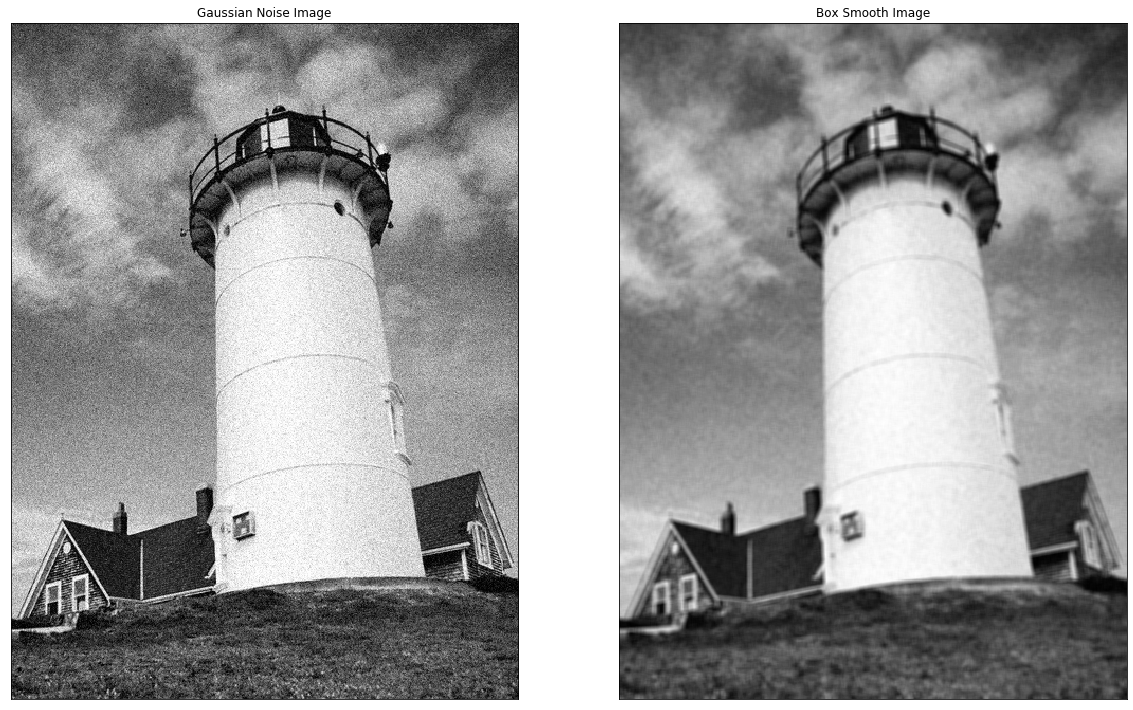

In [18]:
# apply 5x5 box filter
gaussian_lighthouse_img_blur = cv2.blur(gaussian_lighthouse_img_grey, (5,5))

# display original and box smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaussian_lighthouse_img_grey, cmap="gray")
plt.title("Gaussian Noise Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_lighthouse_img_blur, cmap="gray")
plt.title("Box Smooth Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Peak Signal-to-Noise Ratio (PSNR) for Gaussian Noise

In [19]:
# get PSNR for both gaussian and box filters
gauss_PSNR = cv2.PSNR(lighthouse_img_grey, gaussian_lighthouse_img_gauss)
blur_PSNR = cv2.PSNR(lighthouse_img_grey, gaussian_lighthouse_img_blur)

print("Gauss PSNR: {gauss}\nBox PSNR: {box}".format(gauss = gauss_PSNR, box = blur_PSNR))

Gauss PSNR: 26.016045094317292
Box PSNR: 25.30001356425746


Here, we see gaussian filtering has a superior PSNR than box filtering, at least for gaussian noise.

### Gaussian Filter Applied to Noisy Image

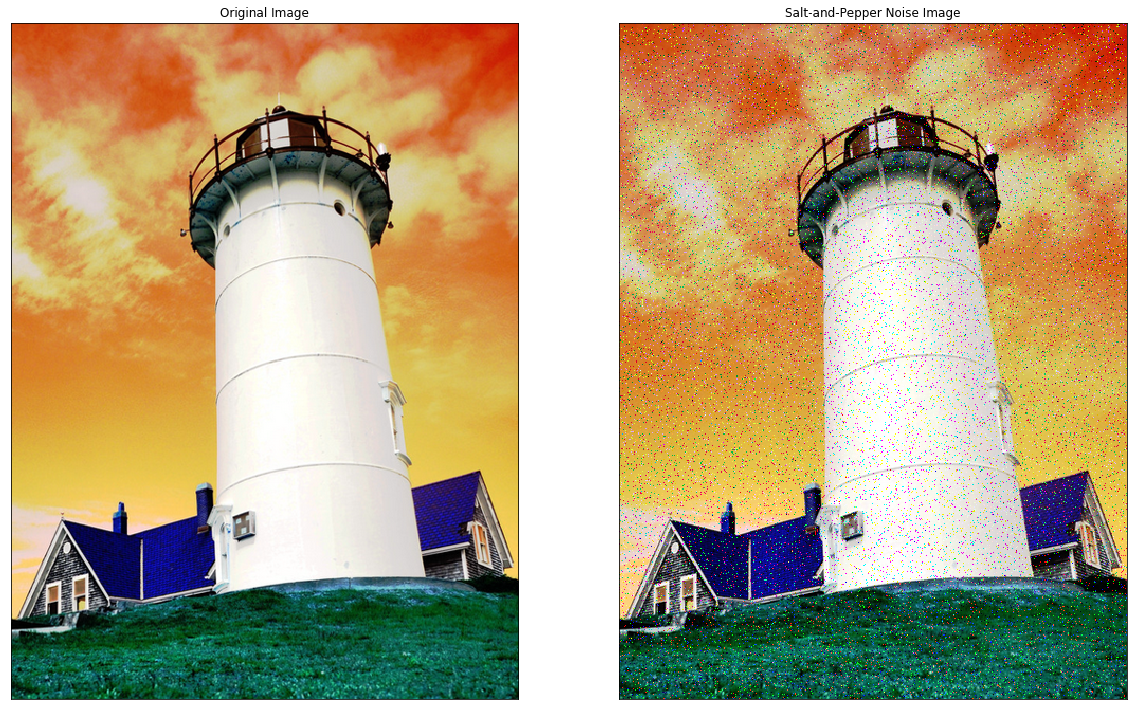

In [20]:
# load and display image
saltandpepper_lighthouse_img = cv2.imread("./images/saltandpepper_lighthouse.png")

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(lighthouse_img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(saltandpepper_lighthouse_img, cmap="gray")
plt.title("Salt-and-Pepper Noise Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
# convert to grayscale
saltandpepper_lighthouse_img_grey = cv2.cvtColor(saltandpepper_lighthouse_img, cv2.COLOR_BGR2GRAY)

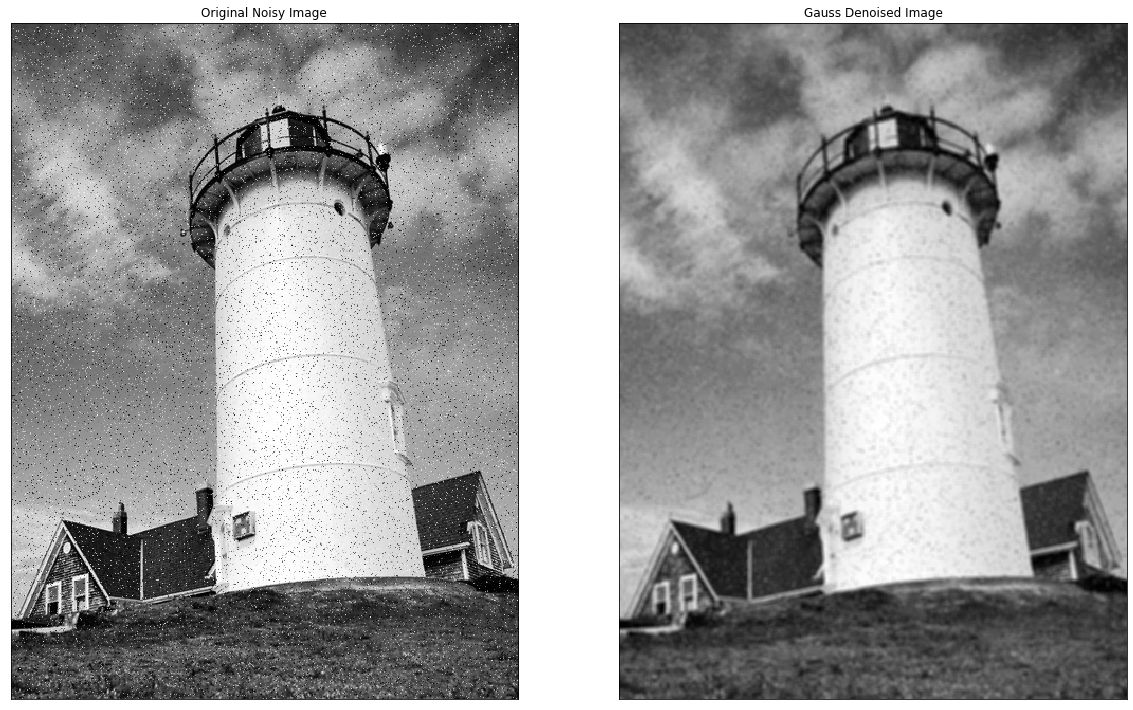

In [27]:
# apply 5x5 box filter
saltandpepper_lighthouse_img_gauss = cv2.GaussianBlur(saltandpepper_lighthouse_img_grey, (5,5), 2)

# display noisy and gaussian smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(saltandpepper_lighthouse_img_grey, cmap="gray")
plt.title("Original Noisy Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(saltandpepper_lighthouse_img_gauss, cmap="gray")
plt.title("Gauss Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Median Filter Applied to Noisy Image

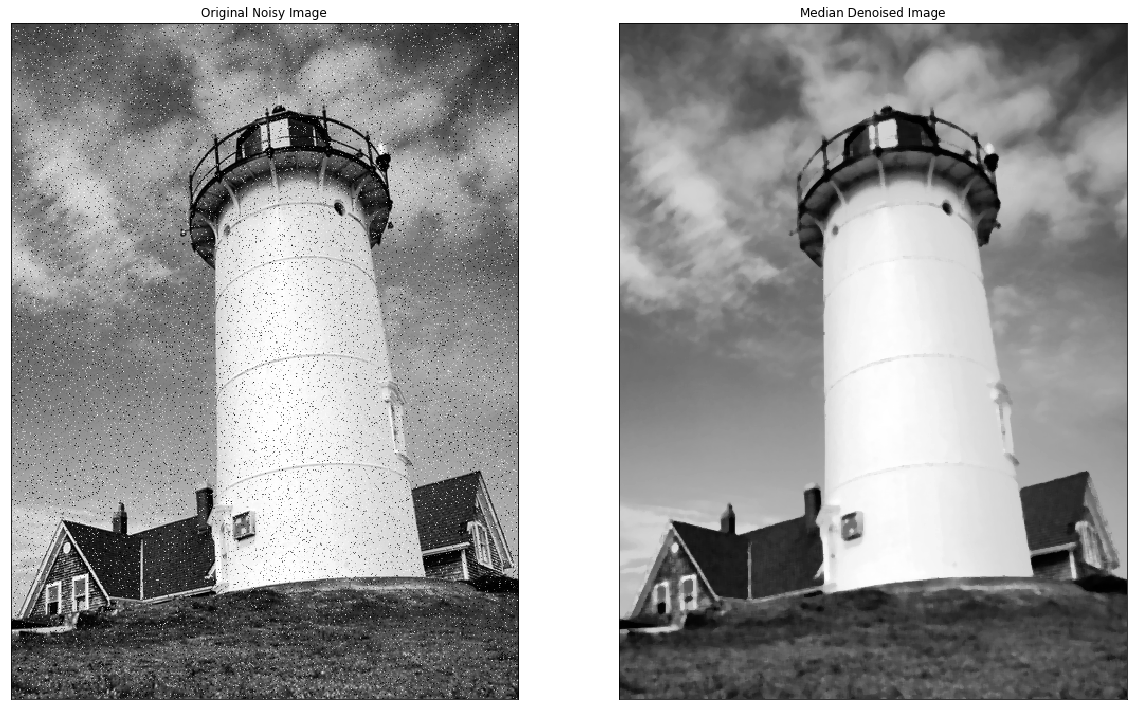

In [28]:
# apply 5x5 median filter
saltandpepper_lighthouse_img_median = cv2.medianBlur(saltandpepper_lighthouse_img_grey, 5)

# display noisy and median smoothed image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(saltandpepper_lighthouse_img_grey, cmap="gray")
plt.title("Original Noisy Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(saltandpepper_lighthouse_img_median, cmap="gray")
plt.title("Median Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Peak Signal-to-Noise Ratio (PSNR) for Salt-and-Pepper Noise

In [29]:
# get PSNR for both gaussian and median filters
gauss_PSNR_saltandpepper = cv2.PSNR(lighthouse_img_grey, saltandpepper_lighthouse_img_gauss)
median_PSNR_saltandpepper = cv2.PSNR(lighthouse_img_grey, saltandpepper_lighthouse_img_median)

print("Gauss PSNR: {gauss}\nMedian PSNR: {median}".format(gauss = gauss_PSNR_saltandpepper, median = median_PSNR_saltandpepper))

Gauss PSNR: 25.624362783755128
Median PSNR: 26.809189025548324


Here, we see median filtering has a superior PSNR than gaussian filtering for salt-and-pepper noise.

## Sobel Edge Detector
1.  Apply a Sobel edge detector with the kernel size of 3×3, 5×5 and 7×7 to the image. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image.
2.  Comment on the effect of filter size on the output.
3.  Apply a Sobel edge detector with the kernel size of 3 × 3. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image.
4.  Denoise the image with a 3 × 3 box filter and then apply the same Sobel edge detector, with the same values of the thresholds, from the previous question.
5.  Comment on the effectiveness of using denoising prior to edge detection.

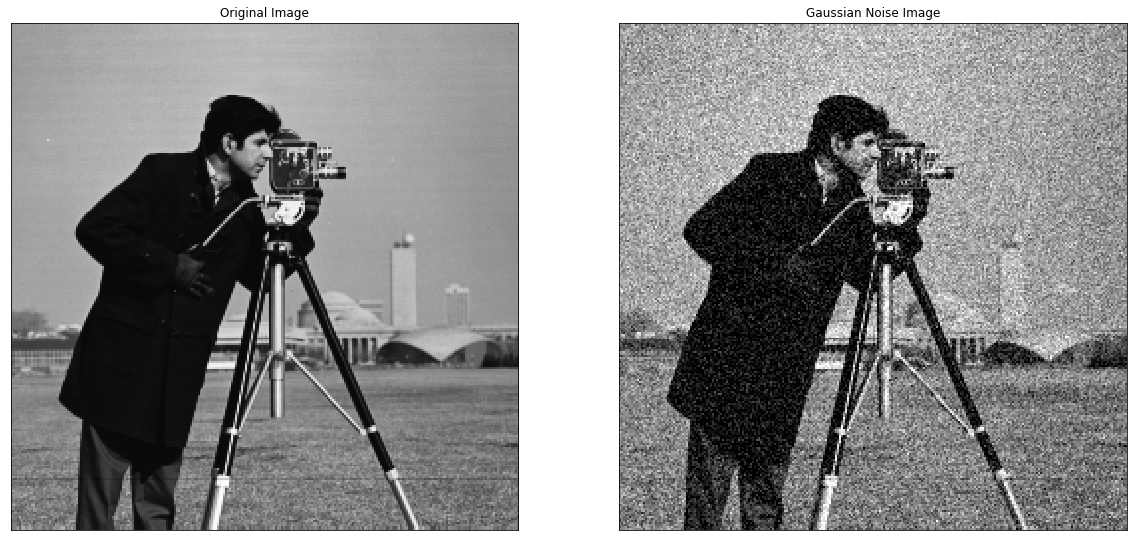

In [36]:
# load and display images
cameraman_img = cv2.imread("./images/cameraman.png")
gaussian_cameraman_img = cv2.imread("./images/gaussian_cameraman.png")

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(cameraman_img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_cameraman_img, cmap="gray")
plt.title("Gaussian Noise Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
# convert to grayscale and get dimensions
cameraman_img_grey = cv2.cvtColor(cameraman_img, cv2.COLOR_BGR2GRAY)
gaussian_cameraman_img_grey = cv2.cvtColor(gaussian_cameraman_img, cv2.COLOR_BGR2GRAY)
cameraman_height, cameraman_width = cameraman_img_grey.shape

### Sobel Edge Applied to Clean Image

In [66]:
# apply 3x3 sobel filter
cameraman_img_sobel_3x3 = cv2.Sobel(cameraman_img, cv2.CV_8U, 1, 1, ksize=3)

# apply 5x5 sobel filter
cameraman_img_sobel_5x5 = cv2.Sobel(cameraman_img, cv2.CV_8U, 1, 1, ksize=5)

# apply 7x7 sobel filter
cameraman_img_sobel_7x7 = cv2.Sobel(cameraman_img, cv2.CV_8U, 1, 1, ksize=7)

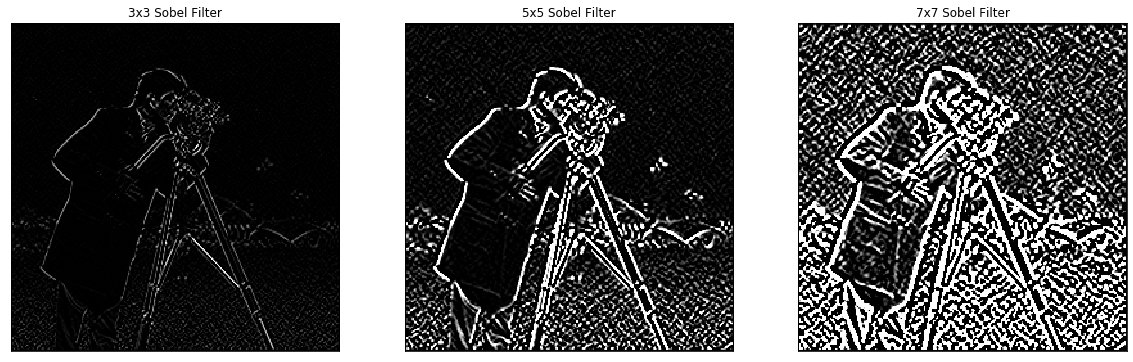

In [67]:
# display unthresholded sobel-filtered images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cameraman_img_sobel_3x3, cmap="gray")
plt.title("3x3 Sobel Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cameraman_img_sobel_5x5, cmap="gray")
plt.title("5x5 Sobel Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cameraman_img_sobel_7x7, cmap="gray")
plt.title("7x7 Sobel Filter"), plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
# set the threshold values
SOBEL_THRESHES = (int(round(0.1 * 255)), int(round(0.2 * 255)))

# threshold the sobel-filtered images
cameraman_sobel_thresh = []
cameraman_sobel_thresh.append((cv2.threshold(cameraman_img_sobel_3x3, SOBEL_THRESHES[0], 255, cv2.THRESH_BINARY), cv2.threshold(cameraman_img_sobel_3x3, SOBEL_THRESHES[1], 255, cv2.THRESH_BINARY)))
cameraman_sobel_thresh.append((cv2.threshold(cameraman_img_sobel_5x5, SOBEL_THRESHES[0], 255, cv2.THRESH_BINARY), cv2.threshold(cameraman_img_sobel_5x5, SOBEL_THRESHES[1], 255, cv2.THRESH_BINARY)))
cameraman_sobel_thresh.append((cv2.threshold(cameraman_img_sobel_7x7, SOBEL_THRESHES[0], 255, cv2.THRESH_BINARY), cv2.threshold(cameraman_img_sobel_7x7, SOBEL_THRESHES[1], 255, cv2.THRESH_BINARY)))

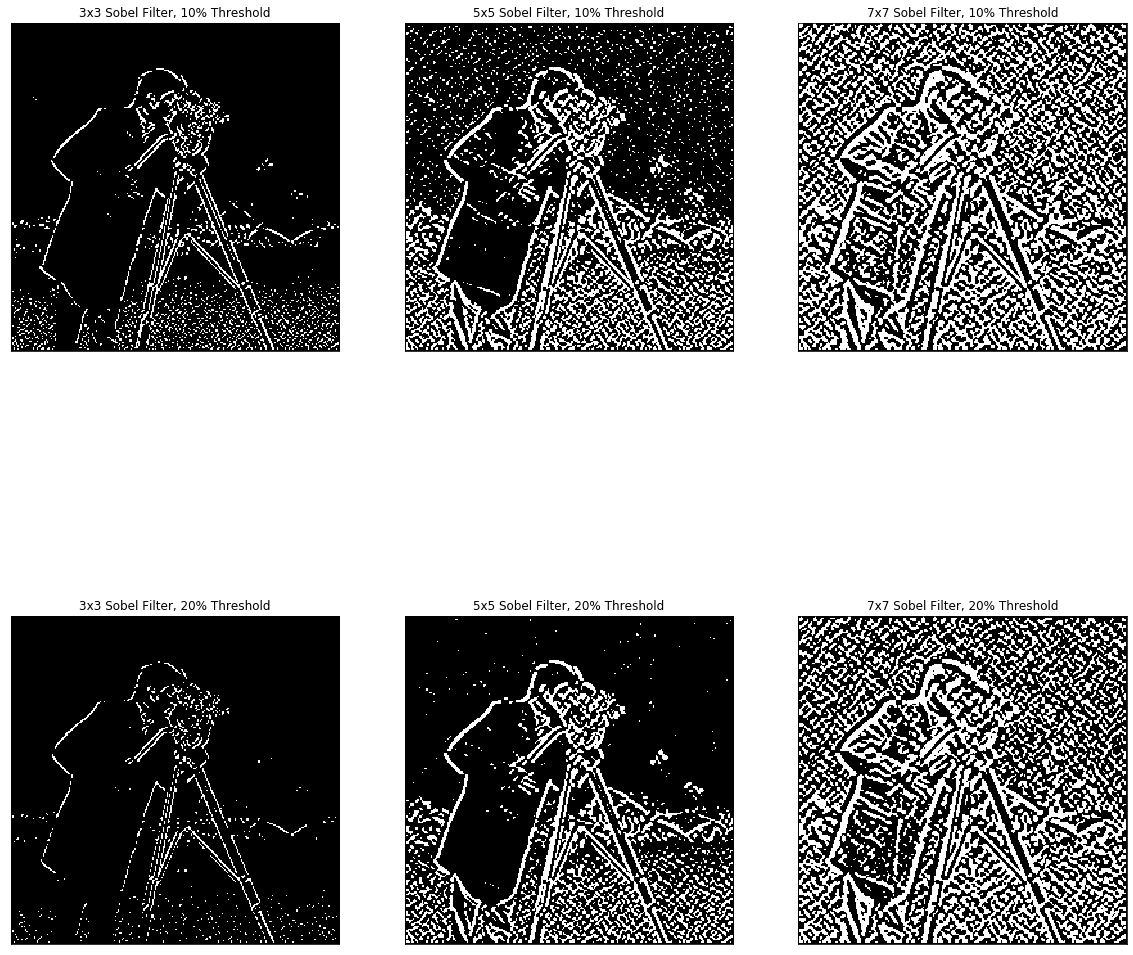

In [69]:
# display thresholded sobel-filtered images
plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(cameraman_sobel_thresh[0][0][1], cmap="gray")
plt.title("3x3 Sobel Filter, 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(cameraman_sobel_thresh[1][0][1], cmap="gray")
plt.title("5x5 Sobel Filter, 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(cameraman_sobel_thresh[2][0][1], cmap="gray")
plt.title("7x7 Sobel Filter, 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(cameraman_sobel_thresh[0][1][1], cmap="gray")
plt.title("3x3 Sobel Filter, 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(cameraman_sobel_thresh[1][1][1], cmap="gray")
plt.title("5x5 Sobel Filter, 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(cameraman_sobel_thresh[2][1][1], cmap="gray")
plt.title("7x7 Sobel Filter, 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

We observe above that a larger filter size catches much more texture for a given threshold value. Meanwhile, a smaller filter size cuts out the more "minor" edges, leaving mostly the major edges.

### Sobel Edge Applied to Noisy Image

In [73]:
# apply 3x3 sobel filter
gaussian_cameraman_img_sobel_3x3 = cv2.Sobel(gaussian_cameraman_img_grey, cv2.CV_8U, 1, 1, ksize=3)

# threshold the sobel-filtered image
gaussian_cameraman_img_sobel_3x3_10 = cv2.threshold(gaussian_cameraman_img_sobel_3x3, SOBEL_THRESHES[0], 255, cv2.THRESH_BINARY)
gaussian_cameraman_img_sobel_3x3_20 = cv2.threshold(gaussian_cameraman_img_sobel_3x3, SOBEL_THRESHES[1], 255, cv2.THRESH_BINARY)

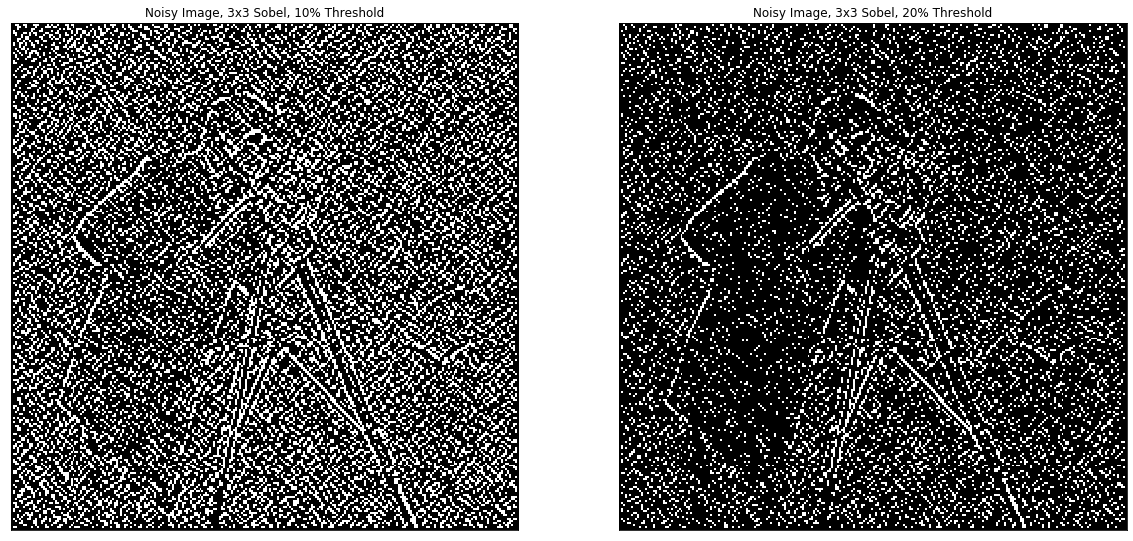

In [74]:
# display the thresholded images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaussian_cameraman_img_sobel_3x3_10[1], cmap="gray")
plt.title("Noisy Image, 3x3 Sobel, 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_cameraman_img_sobel_3x3_20[1], cmap="gray")
plt.title("Noisy Image, 3x3 Sobel, 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

### Sobel Edge Applied to Denoised Image

In [75]:
# apply 3x3 box filter
gaussian_cameraman_img_blur = cv2.blur(gaussian_cameraman_img_grey, (3,3))

# apply 3x3 sobel filter
gaussian_cameraman_img_blur_sobel = cv2.Sobel(gaussian_cameraman_img_blur, cv2.CV_8U, 1, 1, ksize=3)

# threshold the sobel-filtered image
gaussian_cameraman_img_blur_sobel_10 = cv2.threshold(gaussian_cameraman_img_blur_sobel, SOBEL_THRESHES[0], 255, cv2.THRESH_BINARY)
gaussian_cameraman_img_blur_sobel_20 = cv2.threshold(gaussian_cameraman_img_blur_sobel, SOBEL_THRESHES[1], 255, cv2.THRESH_BINARY)

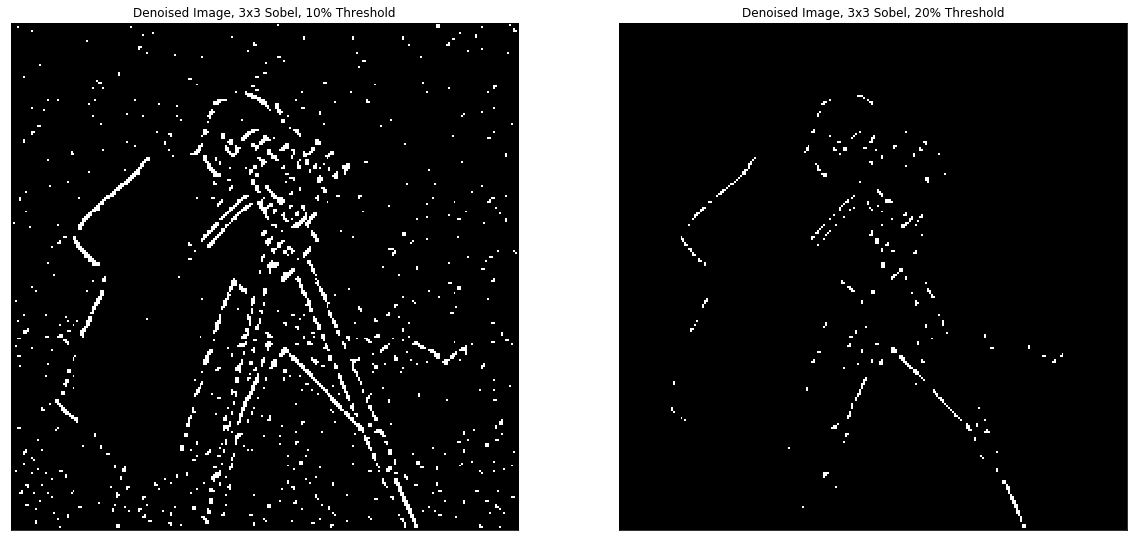

In [76]:
# display the thresholded images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaussian_cameraman_img_blur_sobel_10[1], cmap="gray")
plt.title("Denoised Image, 3x3 Sobel, 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_cameraman_img_blur_sobel_20[1], cmap="gray")
plt.title("Denoised Image, 3x3 Sobel, 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

We observe above that denoising prior to sobel edge detection definitely helps cut out the noise, however, much fine texture is lost, such as in the grass. We do get to mostly keep our primary edges, but the box filtering does lessen the gradient nonetheless.

## Canny Edge Detection
1.  Briefly describe the 4 main steps of Canny edge detection.
2.  As you saw in Tutorial-2, the 3 main hyperparameters of Canny Edge detection are the Gaussian Smoothing Kernel size (K), and the Lower (L) and Higher (H) Thresholds used for Hysteresis. In this section, we will observe the effect of changing these hyperparameters. You will experiment on 3 different values for all 3 parameters (K = 5,9,13, L = 10,30,50, H = 100, 150,200). Vary the values of each hyper-parameter and keep other hyper-parameters constant. Do this procedure for all combination of hyper-parameters mentioned above. This should results in total 27 triplets of hyper-parameters. E.g. (K,L,U) = (5,10,100), (5,10,150), (9,10,200), .... Use canny edge detection (cv2.GaussianBlur and cv2.Canny) for each of these triplets.
3.  Comment on how changing values of each hyper-parameters (K,L,U) effects the overall edge detection. Is there is any relationship between any hyper-parameters?
4.  Find a value of each hyper-parameter such that only dolphin edges are detected. (Figure 4(b))

### Primary Steps of Canny Edge Detection
1.  Step 1: Filter the image with the x and y derivatives of the Gaussian.
2.  Step 2: Calculate the magnitude and orientation of the gradient at every point.
3.  Step 3: Suppress non-maxima along orientation of the gradient.
4.  Step 4: Threshold at two different values to get a noisier image with more of the edges and a less noisy image but with less of the edges; extrapolate where the "real" edges are while keeping out the noise.

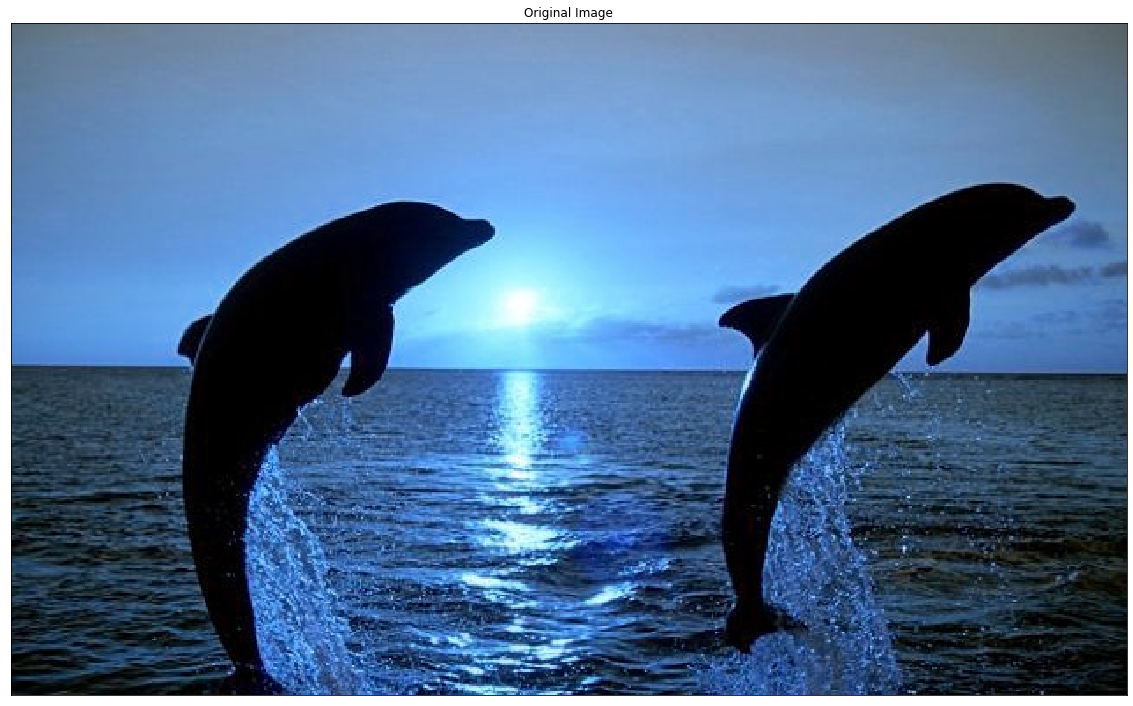

In [78]:
# load and display image
dolphin_img = cv2.imread("./images/dolphin.jpg")

plt.figure(figsize=(20, 20))
plt.subplot(111), plt.imshow(dolphin_img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [82]:
# convert to grayscale and get dimensions
dolphin_img_grey = cv2.cvtColor(dolphin_img, cv2.COLOR_BGR2GRAY)
dolphin_height, dolphin_width = dolphin_img_grey.shape

In [83]:
# set hyperparameter options
GAUSSIAN_SIZES = (5,9,13)
LOWER_THRESHES = (10,30,50)
HIGHER_THRESHES = (100,150,200)

# set all possible combinations of hyperparameters
HYPERPARAMS = []
for size in GAUSSIAN_SIZES:
    for lower_thresh in LOWER_THRESHES:
        for higher_thresh in HIGHER_THRESHES:
            HYPERPARAMS.append((size, lower_thresh, higher_thresh))

In [90]:
# apply gaussian smoothing and canny edge detector for all sets of hyper params to image
canny_edges = []
for hyperparam in HYPERPARAMS:
    # extract hyperparams (for readability)
    ksize = hyperparam[0]
    lthresh = hyperparam[1]
    hthresh = hyperparam[2]
    
    # apply gaussian filter to image
    dolphin_img_smoothed = cv2.GaussianBlur(dolphin_img_grey, (ksize,ksize), 2)
    
    # apply canny edge detector and add to list
    canny_edges.append((hyperparam, cv2.Canny(dolphin_img_smoothed, lthresh, hthresh)))

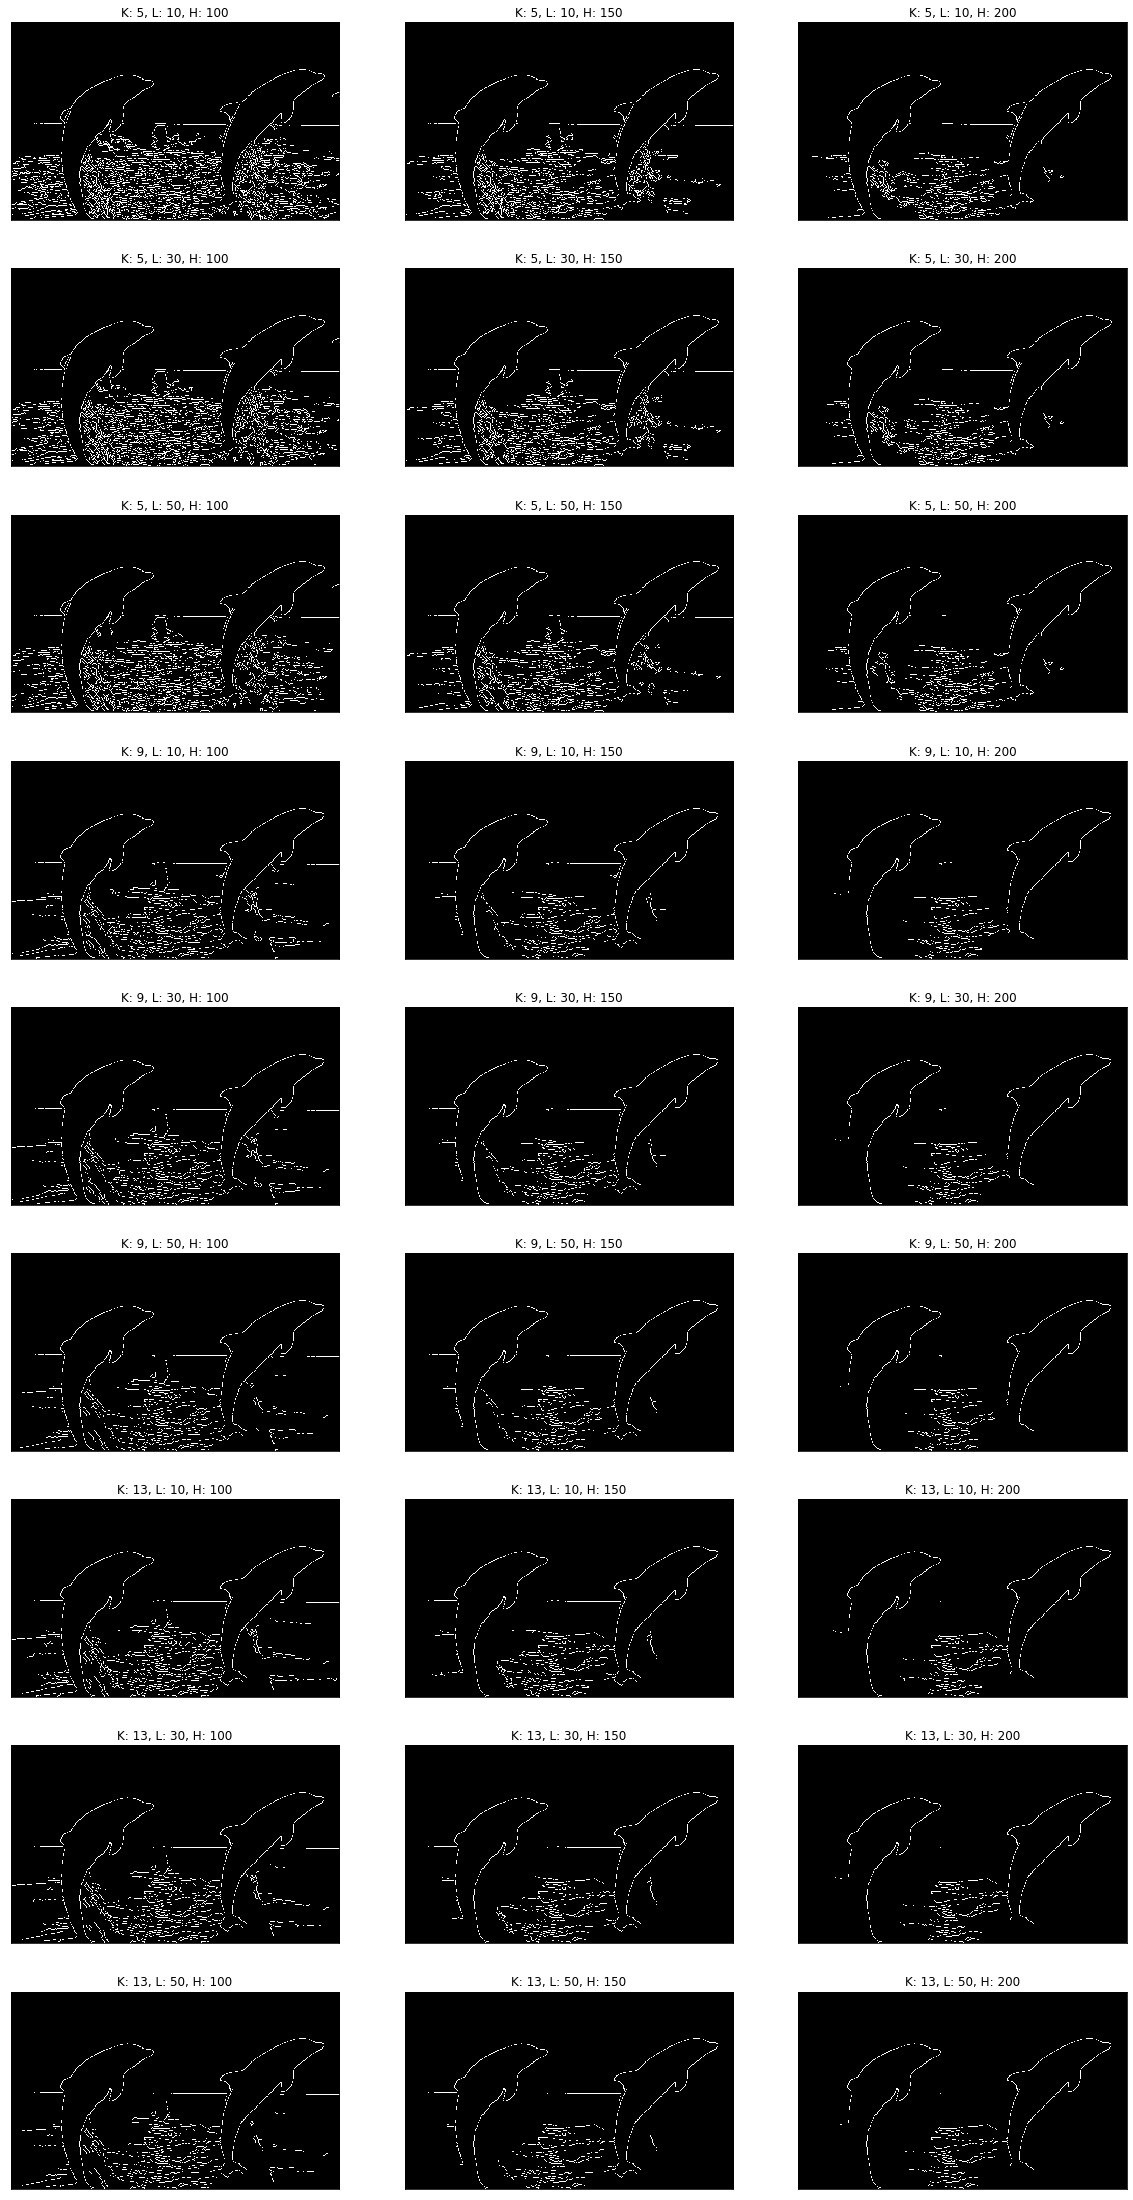

In [94]:
# display the thresholded images
plt.figure(figsize=(20, 40))
for i in range(len(canny_edges)):
    plt.subplot(9, 3, i + 1), plt.imshow(canny_edges[i][1], cmap="gray")
    plt.title("K: {}, L: {}, H: {}".format(canny_edges[i][0][0], canny_edges[i][0][1], canny_edges[i][0][2])), plt.xticks([]), plt.yticks([])
plt.show()

From the images above, we can note a few patterns regarding the hyperparameters, K, L, and H:
* Increasing K helps eliminate unwanted texture from the water and the splash, but it also reduces the sharpness of wanted edges, making them easier to be thresholded out.
* The closer L and H are, the more complete our desired edges are, but this comes at cost of more miscellaneous edges being let through.
* In general, increasing L and H decreases the amount of miscellaneous edges being kept.

In [97]:
# function that takes in a set of hyperparams and prints an image with canny edge detector applied
def show_canny_edges(img, ksize, lthresh, hthresh):
    # apply gaussian filter to image
    img_smoothed = cv2.GaussianBlur(img, (ksize,ksize), 2)
    
    # apply canny edge detector
    img_edges = cv2.Canny(img_smoothed, lthresh, hthresh)
    
    # display image edges
    plt.figure(figsize=(20, 20))
    plt.subplot(111), plt.imshow(img_edges, cmap="gray")
    plt.title("K: {}, L: {}, H: {}".format(ksize, lthresh, hthresh)), plt.xticks([]), plt.yticks([])
    plt.show()

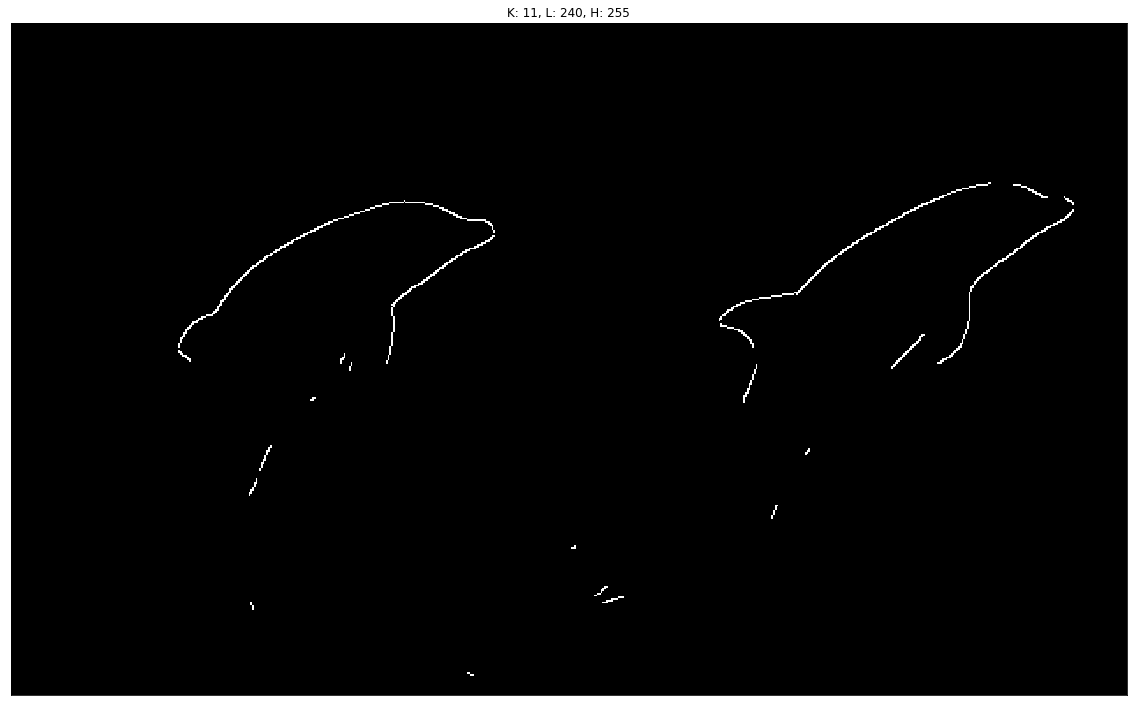

In [140]:
show_canny_edges(dolphin_img_grey, 11, 240, 255)

We see above that (K = 11, L = 240, H = 255) leaves us with only the dolphin edges (although their tails are missing) and only two little non-dolphin blips.